<a href="https://colab.research.google.com/github/kartik5465/deeplearning/blob/master/10_OBJECT_DETECTION_USING_PRETRAINED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a program for object detection using pre trained models to use object detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

from keras.applications import imagenet_utils
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [ ]:
n_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg_model.input, outputs=out)

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=0)]

In [ ]:
n_epochs = 50
batch_size = 512
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.4600

79/79 [==============================] - 18s 104ms/step - loss: 1.5691 - accuracy: 0.4600 - val_loss: 1.3265 - val_accuracy: 0.5381
Epoch 2/50
78/79 [============================>.] - ETA: 0s - loss: 1.2693 - accuracy: 0.5627

79/79 [==============================] - 6s 76ms/step - loss: 1.2693 - accuracy: 0.5627 - val_loss: 1.2524 - val_accuracy: 0.5665
Epoch 3/50
78/79 [============================>.] - ETA: 0s - loss: 1.2013 - accuracy: 0.5826

79/79 [==============================] - 6s 78ms/step - loss: 1.2015 - accuracy: 0.5826 - val_loss: 1.2099 - val_accuracy: 0.5760
Epoch 4/50
78/79 [============================>.] - ETA: 0s - loss: 1.1536 - accuracy: 0.6007

79/79 [==============================] - 6s 75ms/step - loss: 1.1539 - accuracy: 0.6007 - val_loss: 1.2034 - val_accuracy: 0.5819
Epoch 5/50
78/79 [============================>.] - ETA: 0s - loss: 1.1220 - accuracy: 0.6127

79/79 [==============================] - 6s 77ms/step - loss: 1.1218 - accuracy: 0.6127 - val_loss: 1.1825 - val_accuracy: 0.5901
Epoch 6/50
78/79 [============================>.] - ETA: 0s - loss: 1.0953 - accuracy: 0.6215

79/79 [==============================] - 6s 76ms/step - loss: 1.0955 - accuracy: 0.6213 - val_loss: 1.1713 - val_accuracy: 0.5955
Epoch 7/50
78/79 [============================>.] - ETA: 0s - loss: 1.0725 - accuracy: 0.6283

79/79 [==============================] - 6s 77ms/step - loss: 1.0723 - accuracy: 0.6284 - val_loss: 1.1725 - val_accuracy: 0.5917
Epoch 8/50
78/79 [============================>.] - ETA: 0s - loss: 1.0504 - accuracy: 0.6341

79/79 [==============================] - 6s 76ms/step - loss: 1.0502 - accuracy: 0.6341 - val_loss: 1.1413 - val_accuracy: 0.6038
Epoch 9/50
78/79 [============================>.] - ETA: 0s - loss: 1.0275 - accuracy: 0.6448

79/79 [==============================] - 6s 76ms/step - loss: 1.0273 - accuracy: 0.6448 - val_loss: 1.1349 - val_accuracy: 0.6103
Epoch 10/50
78/79 [============================>.] - ETA: 0s - loss: 1.0035 - accuracy: 0.6520

79/79 [==============================] - 6s 75ms/step - loss: 1.0039 - accuracy: 0.6519 - val_loss: 1.1280 - val_accuracy: 0.6100
Epoch 11/50
78/79 [============================>.] - ETA: 0s - loss: 0.9867 - accuracy: 0.6581

79/79 [==============================] - 6s 76ms/step - loss: 0.9869 - accuracy: 0.6580 - val_loss: 1.1385 - val_accuracy: 0.6021
Epoch 12/50
78/79 [============================>.] - ETA: 0s - loss: 0.9704 - accuracy: 0.6635

79/79 [==============================] - 6s 77ms/step - loss: 0.9700 - accuracy: 0.6636 - val_loss: 1.1275 - val_accuracy: 0.6123
Epoch 13/50
78/79 [============================>.] - ETA: 0s - loss: 0.9476 - accuracy: 0.6740

79/79 [==============================] - 6s 76ms/step - loss: 0.9476 - accuracy: 0.6739 - val_loss: 1.1242 - val_accuracy: 0.6142
Epoch 14/50
78/79 [============================>.] - ETA: 0s - loss: 0.9304 - accuracy: 0.6797

79/79 [==============================] - 6s 75ms/step - loss: 0.9304 - accuracy: 0.6797 - val_loss: 1.1197 - val_accuracy: 0.6181
Epoch 15/50
78/79 [============================>.] - ETA: 0s - loss: 0.9164 - accuracy: 0.6836

79/79 [==============================] - 6s 77ms/step - loss: 0.9162 - accuracy: 0.6837 - val_loss: 1.1151 - val_accuracy: 0.6152
Epoch 16/50
78/79 [============================>.] - ETA: 0s - loss: 0.8931 - accuracy: 0.6923

79/79 [==============================] - 6s 75ms/step - loss: 0.8933 - accuracy: 0.6923 - val_loss: 1.1135 - val_accuracy: 0.6190
Epoch 17/50
78/79 [============================>.] - ETA: 0s - loss: 0.8770 - accuracy: 0.7006

79/79 [==============================] - 6s 77ms/step - loss: 0.8772 - accuracy: 0.7005 - val_loss: 1.1032 - val_accuracy: 0.6223
Epoch 18/50
78/79 [============================>.] - ETA: 0s - loss: 0.8635 - accuracy: 0.7029

79/79 [==============================] - 6s 77ms/step - loss: 0.8633 - accuracy: 0.7030 - val_loss: 1.0936 - val_accuracy: 0.6279
Epoch 19/50
78/79 [============================>.] - ETA: 0s - loss: 0.8476 - accuracy: 0.7095

79/79 [==============================] - 6s 75ms/step - loss: 0.8473 - accuracy: 0.7096 - val_loss: 1.1196 - val_accuracy: 0.6191
Epoch 20/50
78/79 [============================>.] - ETA: 0s - loss: 0.8316 - accuracy: 0.7153

79/79 [==============================] - 6s 77ms/step - loss: 0.8317 - accuracy: 0.7153 - val_loss: 1.1032 - val_accuracy: 0.6281
Epoch 21/50
78/79 [============================>.] - ETA: 0s - loss: 0.8130 - accuracy: 0.7232

79/79 [==============================] - 6s 77ms/step - loss: 0.8132 - accuracy: 0.7231 - val_loss: 1.0962 - val_accuracy: 0.6305
Epoch 22/50
78/79 [============================>.] - ETA: 0s - loss: 0.8037 - accuracy: 0.7260

79/79 [==============================] - 6s 77ms/step - loss: 0.8037 - accuracy: 0.7260 - val_loss: 1.1109 - val_accuracy: 0.6248
Epoch 23/50
78/79 [============================>.] - ETA: 0s - loss: 0.7879 - accuracy: 0.7310

79/79 [==============================] - 6s 77ms/step - loss: 0.7877 - accuracy: 0.7312 - val_loss: 1.1032 - val_accuracy: 0.6252
Epoch 24/50
78/79 [============================>.] - ETA: 0s - loss: 0.7724 - accuracy: 0.7378

79/79 [==============================] - 6s 77ms/step - loss: 0.7724 - accuracy: 0.7378 - val_loss: 1.1140 - val_accuracy: 0.6239
Epoch 25/50
78/79 [============================>.] - ETA: 0s - loss: 0.7582 - accuracy: 0.7432

79/79 [==============================] - 6s 77ms/step - loss: 0.7586 - accuracy: 0.7431 - val_loss: 1.1051 - val_accuracy: 0.6261
Epoch 26/50
78/79 [============================>.] - ETA: 0s - loss: 0.7484 - accuracy: 0.7483

79/79 [==============================] - 6s 75ms/step - loss: 0.7486 - accuracy: 0.7483 - val_loss: 1.1127 - val_accuracy: 0.6292
Epoch 27/50
78/79 [============================>.] - ETA: 0s - loss: 0.7326 - accuracy: 0.7522

79/79 [==============================] - 6s 75ms/step - loss: 0.7328 - accuracy: 0.7522 - val_loss: 1.1203 - val_accuracy: 0.6288
Epoch 28/50
78/79 [============================>.] - ETA: 0s - loss: 0.7183 - accuracy: 0.7584

79/79 [==============================] - 6s 75ms/step - loss: 0.7182 - accuracy: 0.7584 - val_loss: 1.1116 - val_accuracy: 0.6276
Epoch 29/50
78/79 [============================>.] - ETA: 0s - loss: 0.6998 - accuracy: 0.7657

79/79 [==============================] - 6s 77ms/step - loss: 0.7000 - accuracy: 0.7657 - val_loss: 1.1191 - val_accuracy: 0.6289
Epoch 30/50
78/79 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.7671

79/79 [==============================] - 6s 76ms/step - loss: 0.6932 - accuracy: 0.7670 - val_loss: 1.1144 - val_accuracy: 0.6312
Epoch 31/50
78/79 [============================>.] - ETA: 0s - loss: 0.6790 - accuracy: 0.7739

79/79 [==============================] - 6s 75ms/step - loss: 0.6787 - accuracy: 0.7739 - val_loss: 1.1315 - val_accuracy: 0.6294
Epoch 32/50
78/79 [============================>.] - ETA: 0s - loss: 0.6630 - accuracy: 0.7796

79/79 [==============================] - 6s 77ms/step - loss: 0.6631 - accuracy: 0.7794 - val_loss: 1.1202 - val_accuracy: 0.6294
Epoch 33/50
78/79 [============================>.] - ETA: 0s - loss: 0.6507 - accuracy: 0.7838

79/79 [==============================] - 6s 75ms/step - loss: 0.6509 - accuracy: 0.7837 - val_loss: 1.1551 - val_accuracy: 0.6179
Epoch 34/50
78/79 [============================>.] - ETA: 0s - loss: 0.6428 - accuracy: 0.7851

79/79 [==============================] - 6s 76ms/step - loss: 0.6428 - accuracy: 0.7852 - val_loss: 1.1344 - val_accuracy: 0.6273
Epoch 35/50
78/79 [============================>.] - ETA: 0s - loss: 0.6277 - accuracy: 0.7922

79/79 [==============================] - 6s 75ms/step - loss: 0.6279 - accuracy: 0.7922 - val_loss: 1.1323 - val_accuracy: 0.6308
Epoch 36/50
78/79 [============================>.] - ETA: 0s - loss: 0.6174 - accuracy: 0.7972

79/79 [==============================] - 6s 77ms/step - loss: 0.6173 - accuracy: 0.7971 - val_loss: 1.1510 - val_accuracy: 0.6269
Epoch 37/50
78/79 [============================>.] - ETA: 0s - loss: 0.6064 - accuracy: 0.8010

79/79 [==============================] - 6s 75ms/step - loss: 0.6063 - accuracy: 0.8010 - val_loss: 1.1513 - val_accuracy: 0.6259
Epoch 38/50
78/79 [============================>.] - ETA: 0s - loss: 0.5951 - accuracy: 0.8041

79/79 [==============================] - 6s 77ms/step - loss: 0.5952 - accuracy: 0.8041 - val_loss: 1.1538 - val_accuracy: 0.6309
Epoch 39/50
78/79 [============================>.] - ETA: 0s - loss: 0.5830 - accuracy: 0.8080

79/79 [==============================] - 6s 75ms/step - loss: 0.5830 - accuracy: 0.8079 - val_loss: 1.1553 - val_accuracy: 0.6287
Epoch 40/50
78/79 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.8139

79/79 [==============================] - 6s 76ms/step - loss: 0.5722 - accuracy: 0.8138 - val_loss: 1.1600 - val_accuracy: 0.6308
Epoch 41/50
78/79 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.8193

79/79 [==============================] - 6s 75ms/step - loss: 0.5588 - accuracy: 0.8194 - val_loss: 1.1773 - val_accuracy: 0.6244
Epoch 42/50
78/79 [============================>.] - ETA: 0s - loss: 0.5471 - accuracy: 0.8239

79/79 [==============================] - 6s 76ms/step - loss: 0.5471 - accuracy: 0.8239 - val_loss: 1.2048 - val_accuracy: 0.6189
Epoch 43/50
78/79 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.8219

79/79 [==============================] - 6s 77ms/step - loss: 0.5434 - accuracy: 0.8219 - val_loss: 1.1852 - val_accuracy: 0.6302
Epoch 44/50
78/79 [============================>.] - ETA: 0s - loss: 0.5272 - accuracy: 0.8316

79/79 [==============================] - 6s 78ms/step - loss: 0.5276 - accuracy: 0.8314 - val_loss: 1.1959 - val_accuracy: 0.6254
Epoch 45/50
78/79 [============================>.] - ETA: 0s - loss: 0.5168 - accuracy: 0.8348

79/79 [==============================] - 6s 77ms/step - loss: 0.5165 - accuracy: 0.8350 - val_loss: 1.2033 - val_accuracy: 0.6214
Epoch 46/50
78/79 [============================>.] - ETA: 0s - loss: 0.5053 - accuracy: 0.8412

79/79 [==============================] - 6s 76ms/step - loss: 0.5052 - accuracy: 0.8412 - val_loss: 1.1963 - val_accuracy: 0.6305
Epoch 47/50
78/79 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.8416

79/79 [==============================] - 6s 75ms/step - loss: 0.4983 - accuracy: 0.8415 - val_loss: 1.1912 - val_accuracy: 0.6266
Epoch 48/50
78/79 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.8491

79/79 [==============================] - 6s 77ms/step - loss: 0.4838 - accuracy: 0.8492 - val_loss: 1.1912 - val_accuracy: 0.6279
Epoch 49/50
78/79 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.8515

79/79 [==============================] - 6s 75ms/step - loss: 0.4764 - accuracy: 0.8515 - val_loss: 1.2136 - val_accuracy: 0.6209
Epoch 50/50
78/79 [============================>.] - ETA: 0s - loss: 0.4650 - accuracy: 0.8550

79/79 [==============================] - 6s 76ms/step - loss: 0.4649 - accuracy: 0.8551 - val_loss: 1.2325 - val_accuracy: 0.6234


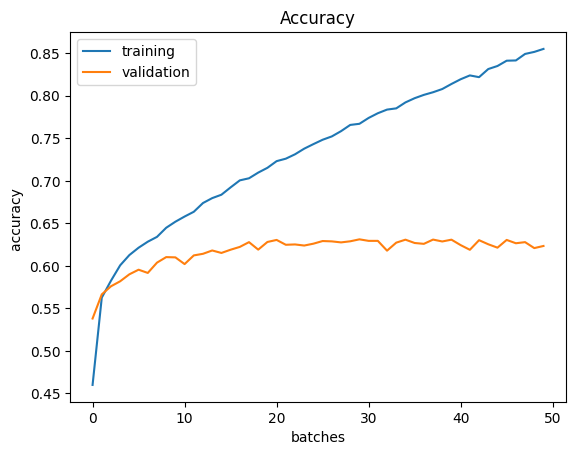

In [ ]:
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'], label='training')
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('batches')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()